## PRUEBA PARCIAL

NOMBRE: PATRICK ZAMORA


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import numpy as np

In [63]:
# Configuración estética
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (9, 5)
plt.rcParams["axes.titlesize"] = 13

In [64]:
print("\nExtraccion de Datos\n")

df = pd.read_csv(r"C:\Users\HP\Downloads\iot_sensor_corrupted_dataset.csv")

print("\nDatos extraídos correctamente de la fuente.\n")
print(df.head())



Extraccion de Datos


Datos extraídos correctamente de la fuente.

             timestamp device_id  temperature_C          humidity_% status
0  2030-05-15 00:00:00  ESP32_A2      26.490142  47.391160456649544     OK
1  2023-01-01 00:30:00  ESP32_A2      24.585207   69.17861947054776     OK
2  2023-01-01 01:00:00  ESP32_B1      26.943066               -10.0     OK
3  2023-01-01 01:30:00  ESP32_B1      29.569090   70.32465260551147     OK
4  2023-01-01 02:00:00  ESP32_A1            NaN   44.80630034045987     OK


In [66]:
# Detección de nulos
print("\nValores faltantes antes de limpieza:\n", df.isnull().sum())



Valores faltantes antes de limpieza:
 timestamp         0
device_id         8
temperature_C    13
humidity_%        7
status            0
dtype: int64


In [67]:
print("\nDatos extraídos correctamente de la fuente.\n")

# ---- TRANSFORMACIÓN ----
print("Procesando limpieza y normalización de datos")

# Conversión de tipo de dato Timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Columnas numericas
df["temperature_C"] = pd.to_numeric(df["temperature_C"], errors="coerce")
df["humidity_%"] = pd.to_numeric(df["humidity_%"], errors="coerce")

# Relleno de valores faltantes 
df["temperature_C"] = df["temperature_C"].fillna(df["temperature_C"].mean())
df["humidity_%"] = df["humidity_%"].fillna(df["humidity_%"].mean())
df["device_id"] = df["device_id"].fillna(df["device_id"].mode()[0])

# Eliminación de duplicados
df.drop_duplicates(inplace=True)

# Creación de nuevas variables 
df["DiaSemana"] = df["timestamp"].dt.day_name()
df["Mes"] = df["timestamp"].dt.month_name()

# Imprimir Valores y Transformacion
print("\nValores faltantes después de limpieza:\n", df.isnull().sum())

print("\nTransformación completada correctamente.\n")




Datos extraídos correctamente de la fuente.

Procesando limpieza y normalización de datos

Valores faltantes después de limpieza:
 timestamp        0
device_id        0
temperature_C    0
humidity_%       0
status           0
DiaSemana        0
Mes              0
dtype: int64

Transformación completada correctamente.



In [69]:
# ---- CARGA ----
# Exportamos el dataset limpio
df.to_csv("prueba.csv", index=False)
print("\nDatos limpios cargados en archivo 'prueba.csv'\n")


Datos limpios cargados en archivo 'prueba.csv'



In [70]:
print("=== Iniciando EDA ===")

# ---- ANÁLISIS DESCRIPTIVO ----
print("\nInformación general del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())


=== Iniciando EDA ===

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 0 to 257
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      252 non-null    datetime64[ns]
 1   device_id      252 non-null    object        
 2   temperature_C  252 non-null    float64       
 3   humidity_%     252 non-null    float64       
 4   status         252 non-null    object        
 5   DiaSemana      252 non-null    object        
 6   Mes            252 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 15.8+ KB
None

Estadísticas descriptivas:
                           timestamp  temperature_C  humidity_%
count                            252     252.000000  252.000000
mean   2023-04-20 07:02:08.571428608      61.437932   57.530897
min              2023-01-01 00:30:00      17.140765  -10.000000
25%              2023-01-

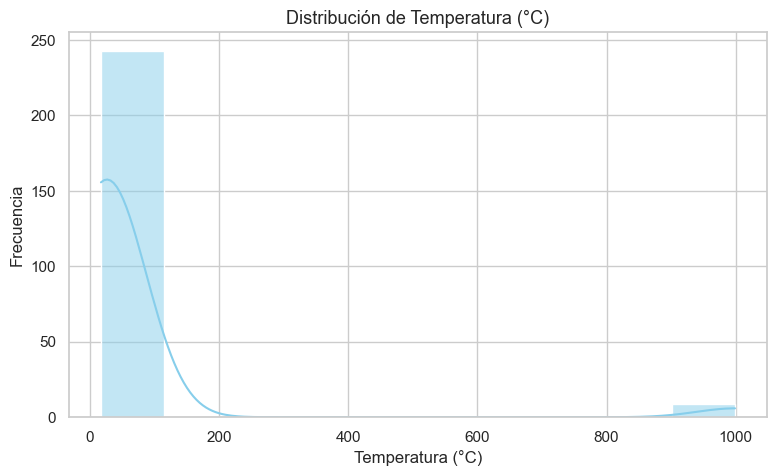

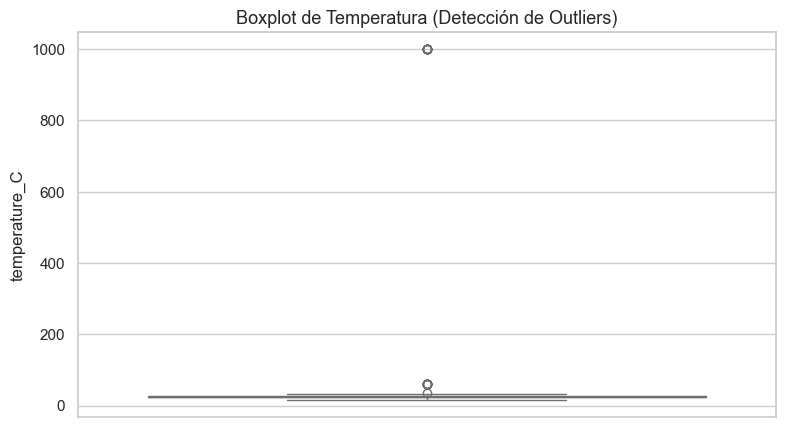

In [73]:
#Histograma
plt.figure()
sns.histplot(df["temperature_C"], bins=10, kde=True, color="skyblue")
plt.title("Distribución de Temperatura (°C)")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.show()

#Boxplot
plt.figure()
sns.boxplot(y="temperature_C", data=df, color="lightcoral")
plt.title("Boxplot de Temperatura (Detección de Outliers)")
plt.show()



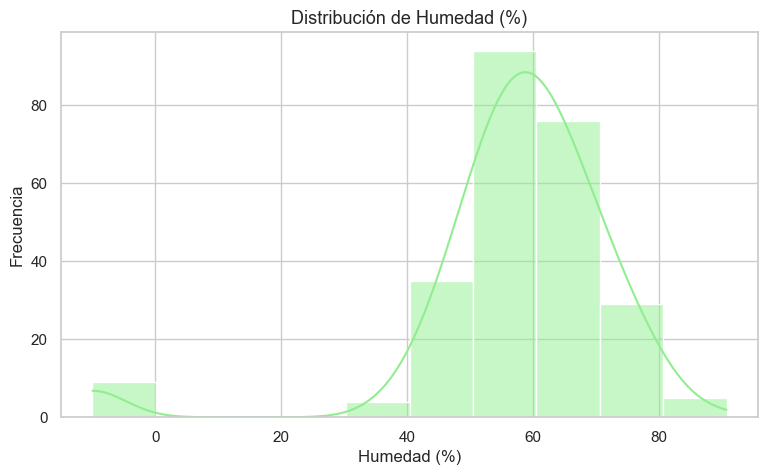

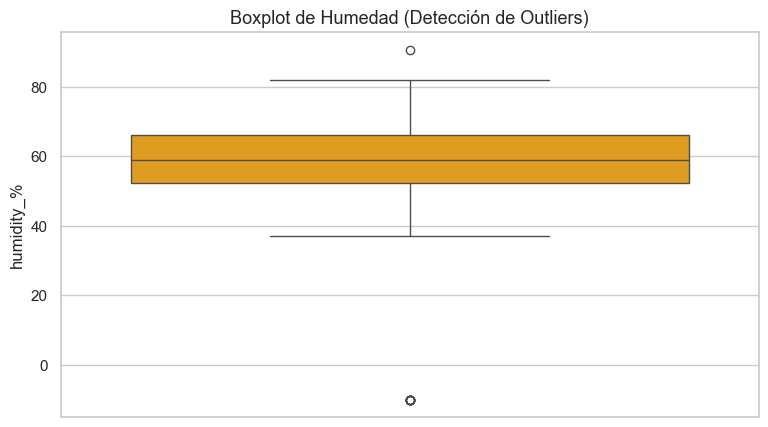

In [72]:

plt.figure()
sns.histplot(df["humidity_%"], bins=10, kde=True, color="lightgreen")
plt.title("Distribución de Humedad (%)")
plt.xlabel("Humedad (%)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure()
sns.boxplot(y="humidity_%", data=df, color="orange")
plt.title("Boxplot de Humedad (Detección de Outliers)")
plt.show()

# Consluiones

- Hay irregularidades en timestamp, temperatura y humedad.

- Existen registros con fechas incorrectas.

- Aparecen valores de texto como "??" en campos numéricos.

- Algunos sensores muestran estado FAIL, indicando fallas del ESP.

- Existe un device_id no registrado en el inventario.

- Se encontró una humedad negativa (-10%), físicamente imposible.

- Hay un valor de temperatura #¡NUM!.

- Se representan datos de:

- Humedad: el punto bajo es -10%.

- Temperatura: el punto alto supera 999°C.